**IMPORT THE NECESSARY LIBRARIES**

In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

*Suppress the warnings*

In [126]:
warnings.filterwarnings("ignore")

In [128]:
# Load the dataset
df = sns.load_dataset("mpg")

In [130]:
# Display the first few rows of the dataset
print(df.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  


**PERFORM EDA**

In [133]:
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [135]:
# Note the horsepower column. It has missing values

In [137]:
# Remove columns that won't help in determining the mpg variable
columns_to_drop = ["name"]
df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [139]:
# Display the updated dataframe
print("\nUpdated DataFrame:")
print(df.head())


Updated DataFrame:
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin  
0          70    usa  
1          70    usa  
2          70    usa  
3          70    usa  
4          70    usa  


In [141]:
# Descriptive statistics of the dataframe
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.491160   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   75.000000  2223.750000   
50%     23.000000    4.000000    148.500000   93.500000  2803.500000   
75%     29.000000    8.000000    262.000000  126.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model_year  
count    398.000000  398.000000  
mean      15.568090   76.010050  
std        2.757689    3.697627  
min        8.000000   70.000000  
25%       13.825000   73.000000  
50%       15.500000   76.000000  
75%       17.175000   79.000000  
max       24.800000   82.000000  


**Skewness** *of variables*

*1. MPG Varaible*

In [145]:
# Calculate median
median_mpg = df['mpg'].median()
print("\nMedian MPG:", median_mpg)


Median MPG: 23.0


In [147]:
# Calculate mean
mean_mpg = df['mpg'].mean()
print("Mean MPG:", mean_mpg)

Mean MPG: 23.514572864321607


In [149]:
# The mean is slightly higher than the median, suggesting right-skewed data

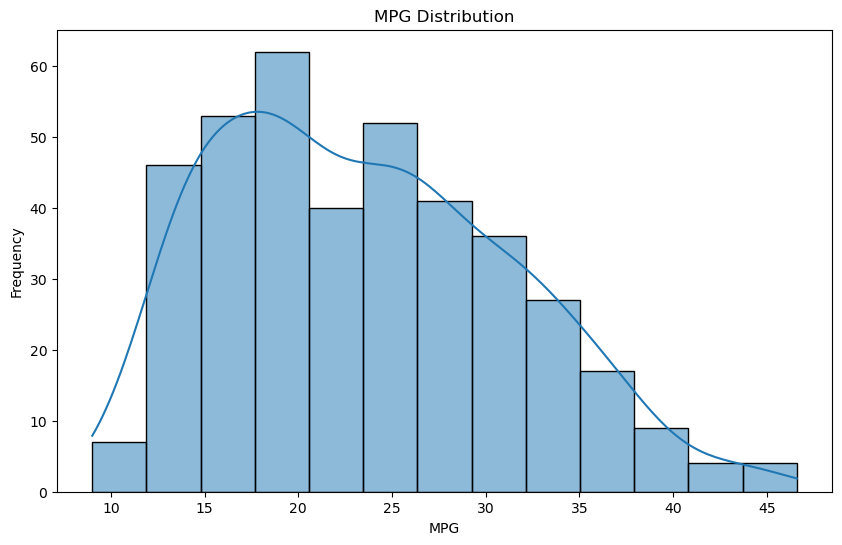

In [151]:
# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['mpg'], kde=True)
plt.title('MPG Distribution')
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.show()

In [153]:
# Calculate standard deviation
std_mpg = df['mpg'].std()
print("Standard Deviation of MPG:", std_mpg)

Standard Deviation of MPG: 7.815984312565782


In [155]:
# Calculate the mode
mode_mpg = df['mpg'].mode().iloc[0]
print("Mode MPG:", mode_mpg)

Mode MPG: 13.0


*Calculate Karl Pearson's coefficient of skewness*

In [158]:
pearson_skewness = (mean_mpg - mode_mpg) / std_mpg
print("Pearson's Skewness:", pearson_skewness)

Pearson's Skewness: 1.3452653490382902


In [160]:
# This indicates that the data in the mpg variable is highly skewed to the right

*2. Horsepower*

In [163]:
# Calculate median
median_horsepower = df['horsepower'].median()
print("\nMedian horsepower:", median_horsepower)


Median horsepower: 93.5


In [165]:
# Calculate mean
mean_horsepower = df['horsepower'].mean()
print("Mean horsepower:", mean_horsepower)

Mean horsepower: 104.46938775510205


In [167]:
# The mean is higher than the median, suggesting right-skewed data

**Data Preprocessing**

In [170]:
# Check for the number of cells with missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64


In [172]:
# Filter the dataframe to show rows that contain null values
print("\nRows with Missing Values:")
print(df[df.isnull().any(axis=1)])


Rows with Missing Values:
      mpg  cylinders  displacement  horsepower  weight  acceleration  \
32   25.0          4          98.0         NaN    2046          19.0   
126  21.0          6         200.0         NaN    2875          17.0   
330  40.9          4          85.0         NaN    1835          17.3   
336  23.6          4         140.0         NaN    2905          14.3   
354  34.5          4         100.0         NaN    2320          15.8   
374  23.0          4         151.0         NaN    3035          20.5   

     model_year  origin  
32           71     usa  
126          74     usa  
330          80  europe  
336          80     usa  
354          81  europe  
374          82     usa  


In [174]:
# Drop the rows that contain null values
df.dropna(inplace=True)

In [176]:
# Confirm that we have actually dropped the empty cells
print("\nMissing Values After Dropping Nulls:")
print(df.isnull().sum())


Missing Values After Dropping Nulls:
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64


In [178]:
# Alternatively, you could also do:
missing_values_present = df.isnull().sum().any()
print("\nMissing Values Present:", missing_values_present)


Missing Values Present: False


**Univarate Analysis**

*Analysis of the cylinder variable*

In [182]:
print("Unique values in 'cylinders':", df.cylinders.unique())
print("Value counts of 'cylinders':\n", df.cylinders.value_counts())

Unique values in 'cylinders': [8 4 6 3 5]
Value counts of 'cylinders':
 cylinders
4    199
8    103
6     83
3      4
5      3
Name: count, dtype: int64


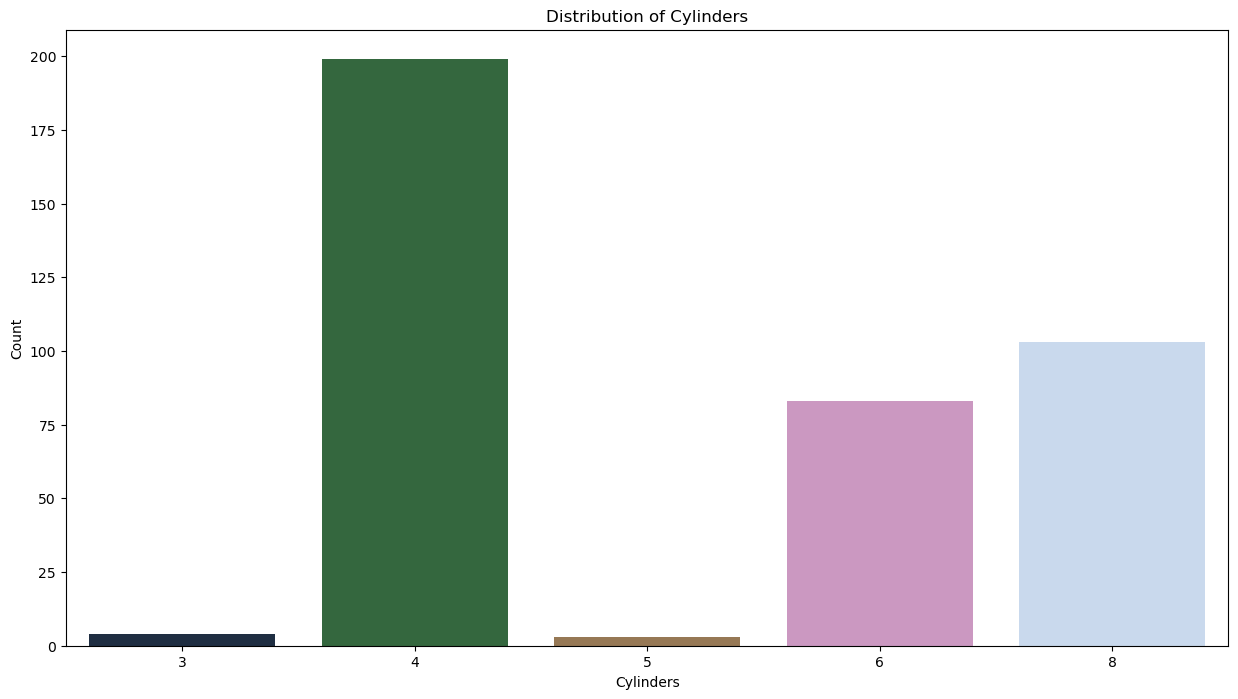

In [184]:
# Visualize 'cylinders' distribution
plt.figure(figsize=(15, 8))
sns.countplot(x="cylinders", data=df, palette="cubehelix")
plt.title('Distribution of Cylinders')
plt.xlabel('Cylinders')
plt.ylabel('Count')
plt.show()

In [186]:
# Vehicles with 4 cylinders have the highest observation value

In [188]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


*Analysis of the 'model_year' variable*

In [191]:
# Adjust the 'model_year' for better clarity
df["model_year"] = 1900 + df.model_year
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,1970,usa
1,15.0,8,350.0,165.0,3693,11.5,1970,usa
2,18.0,8,318.0,150.0,3436,11.0,1970,usa
3,16.0,8,304.0,150.0,3433,12.0,1970,usa
4,17.0,8,302.0,140.0,3449,10.5,1970,usa


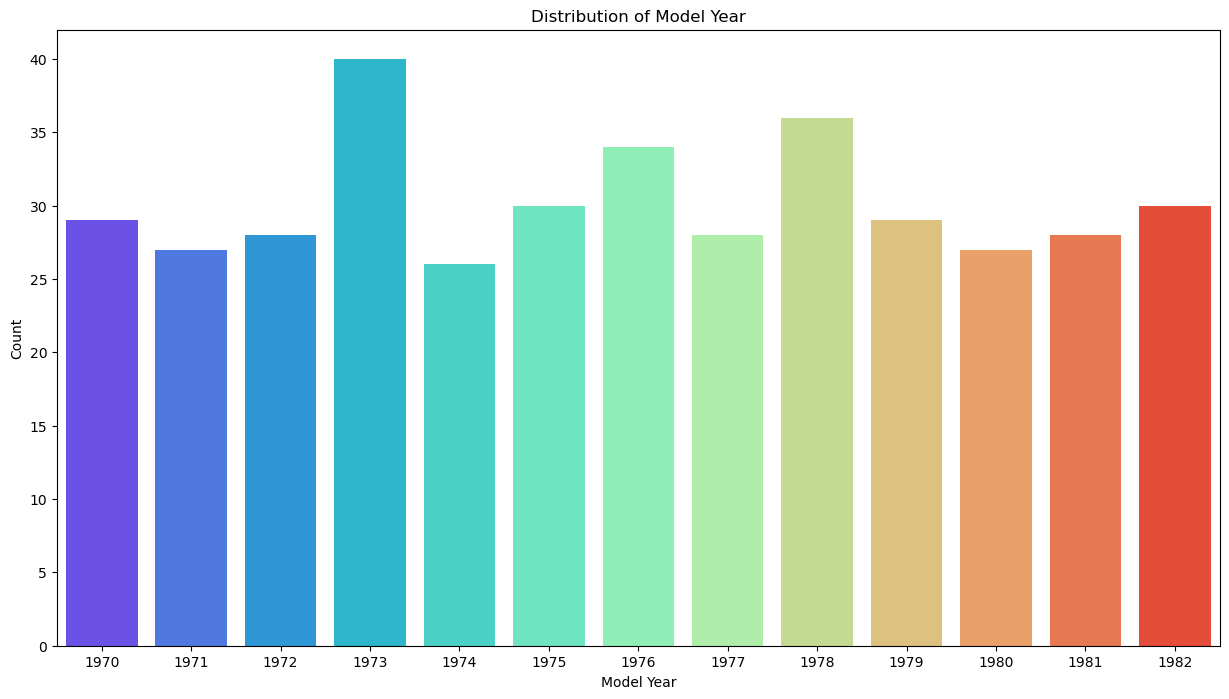

In [193]:
# Visualize 'model_year' distribution
plt.figure(figsize=(15, 8))
sns.countplot(x="model_year", data=df, palette="rainbow")
plt.title('Distribution of Model Year')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.show()

In [195]:
# The majority of the vehicles in the dataset are from the year 1973

*Analysis of the 'origin' variable*

In [198]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,1970,usa
1,15.0,8,350.0,165.0,3693,11.5,1970,usa
2,18.0,8,318.0,150.0,3436,11.0,1970,usa
3,16.0,8,304.0,150.0,3433,12.0,1970,usa
4,17.0,8,302.0,140.0,3449,10.5,1970,usa


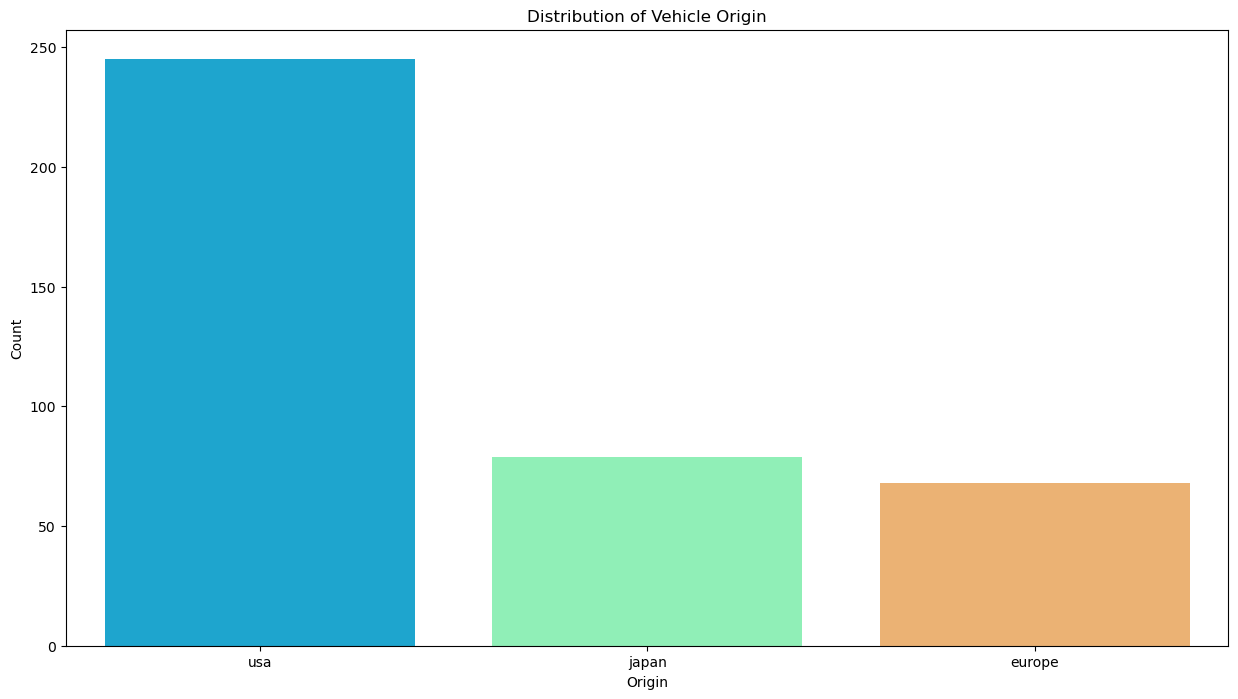

In [200]:
# Visualize 'origin' distribution
plt.figure(figsize=(15, 8))
sns.countplot(x="origin", data=df, palette="rainbow")
plt.title('Distribution of Vehicle Origin')
plt.xlabel('Origin')
plt.ylabel('Count')
plt.show()


In [202]:
# USA is the most common origin for the vehicles in the dataset

In [204]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,1970,usa
1,15.0,8,350.0,165.0,3693,11.5,1970,usa
2,18.0,8,318.0,150.0,3436,11.0,1970,usa
3,16.0,8,304.0,150.0,3433,12.0,1970,usa
4,17.0,8,302.0,140.0,3449,10.5,1970,usa


*Horsepower*

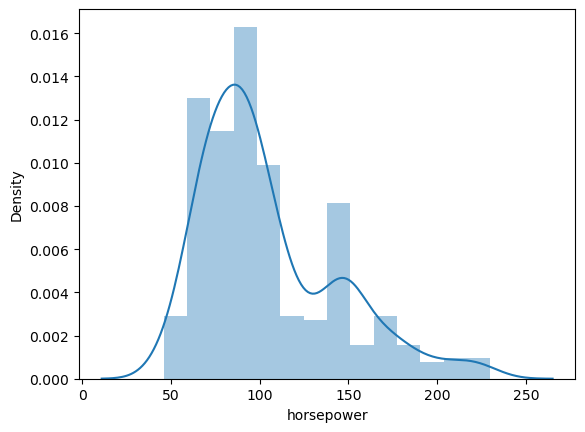

In [207]:
sns.distplot(df["horsepower"])
plt.show()

*Displacement*

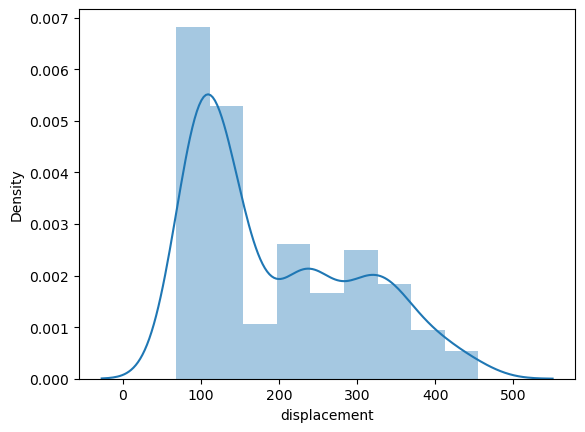

In [210]:
sns.distplot(df["displacement"])
plt.show()

**BIVARIATE ANALYSIS**

*Does the number of cylinders affect the mpg value?*

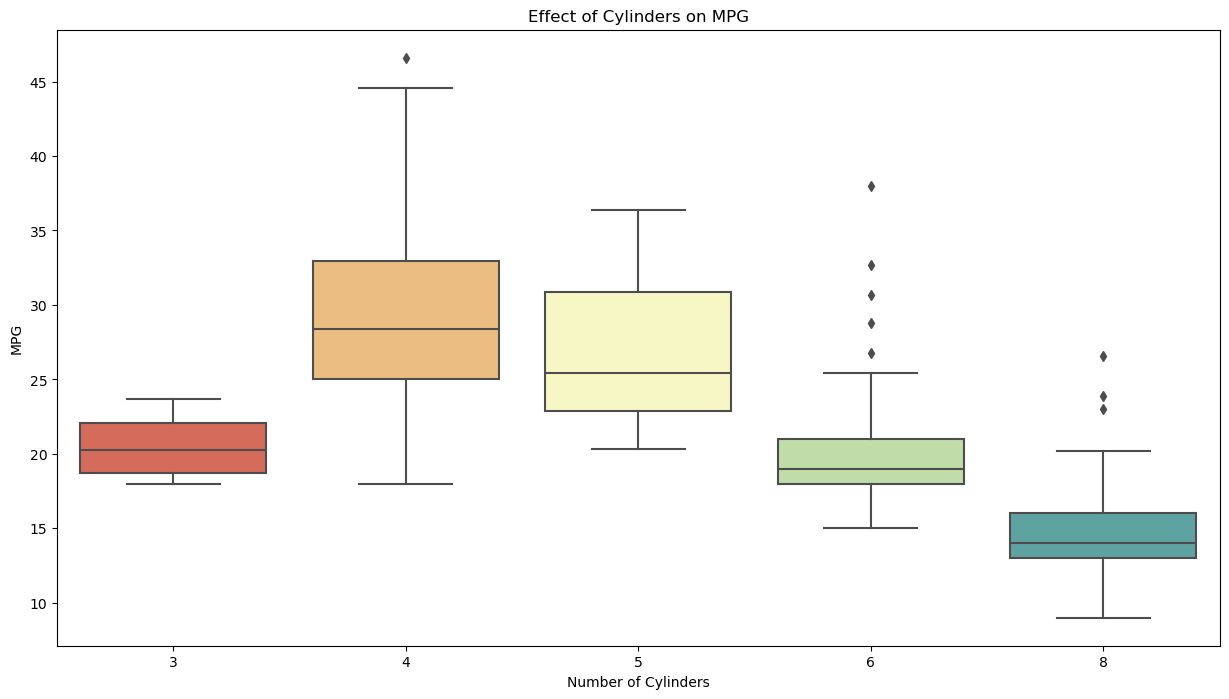

In [274]:
plt.figure(figsize=(15, 8))
sns.boxplot(x="cylinders", y="mpg", data=df, palette="Spectral")
plt.title('Effect of Cylinders on MPG')
plt.xlabel('Number of Cylinders')
plt.ylabel('MPG')
plt.show()

In [276]:
# 4-cylinder vehicles have better mileage (higher mpg values)
# The mpg values decrease as the number of cylinders increases

*Does the number of model_year affect the mpg value?*

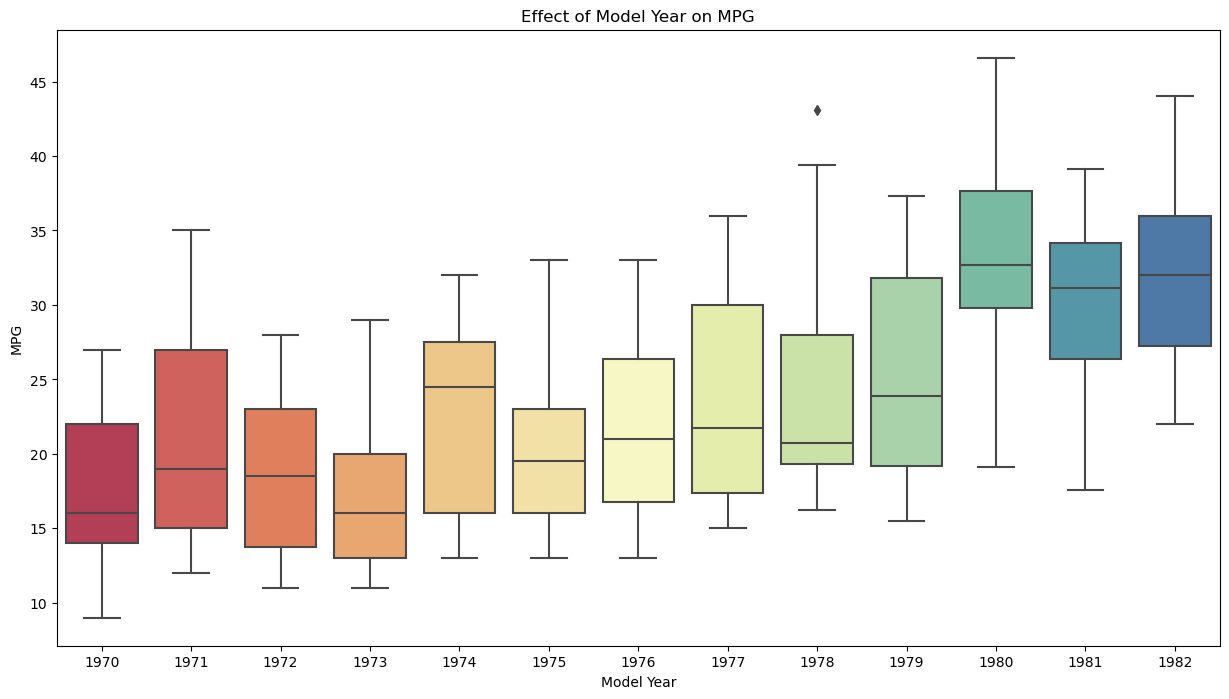

In [278]:
plt.figure(figsize=(15, 8))
sns.boxplot(x="model_year", y="mpg", data=df, palette="Spectral")
plt.title('Effect of Model Year on MPG')
plt.xlabel('Model Year')
plt.ylabel('MPG')
plt.show()

In [ ]:
#As the years increase, the mpg values increase with the newer models

**Multivariate Analysis**

*Horsepower vs. MPG colored by Origin*

<Figure size 1500x900 with 0 Axes>

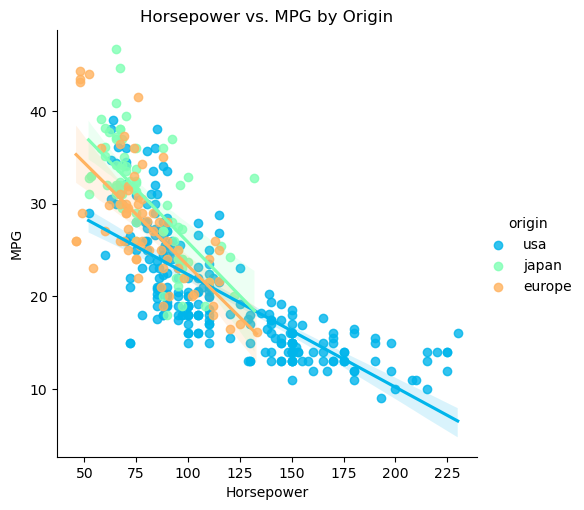

In [281]:
plt.figure(figsize=(15, 9))
sns.lmplot(x="horsepower", y="mpg", hue="origin", data=df, palette="rainbow")
plt.title('Horsepower vs. MPG by Origin')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.show()

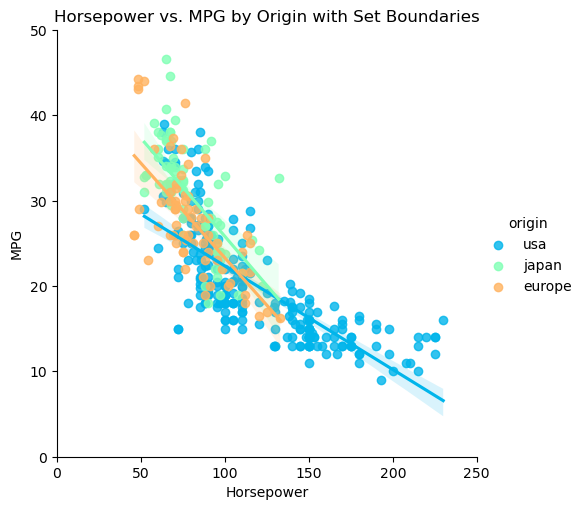

In [283]:
#Let's define the boundaries of the axes
graph = sns.lmplot(x="horsepower", y="mpg", hue="origin", data=df, palette="rainbow")
graph.set(xlim=(0, 250), ylim=(0, 50))
plt.title('Horsepower vs. MPG by Origin with Set Boundaries')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.show()

In [285]:
# Cars produced in all countries have mpg values decrease with increase in horsepower
# The softest reduction occurs in vehicles produced in the USA

*Acceleration vs. MPG colored by Origin*

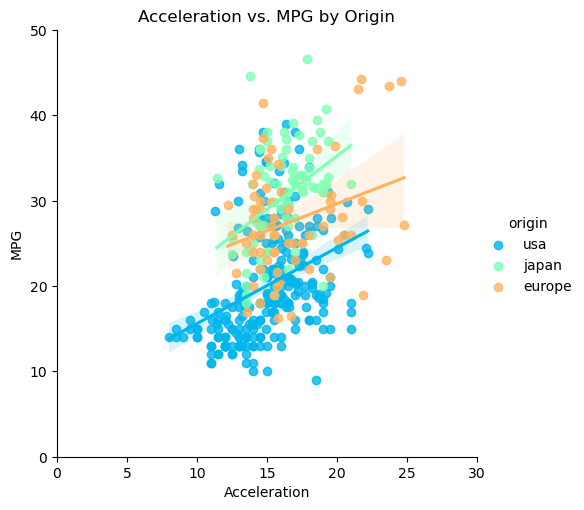

In [288]:
graph = sns.lmplot(x="acceleration", y="mpg", hue="origin", data=df, palette="rainbow")
graph.set(xlim=(0, 30), ylim=(0, 50))
plt.title('Acceleration vs. MPG by Origin')
plt.xlabel('Acceleration')
plt.ylabel('MPG')
plt.show()

In [262]:
#The mpg value increases as the acceleration value increases
# This ratio is lowest in european cars

*Weight vs. MPG colored by Origin*

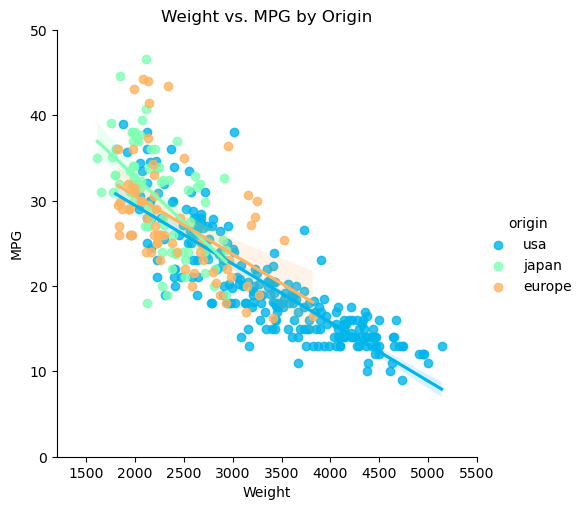

In [291]:
graph = sns.lmplot(x="weight", y="mpg", hue="origin", data=df, palette="rainbow")
graph.set(xlim=(1200, 5500), ylim=(0, 50))
plt.title('Weight vs. MPG by Origin')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.show()

In [266]:
#As the weight increases the mpg value decreases

*Displacement vs. MPG colored by Origin*

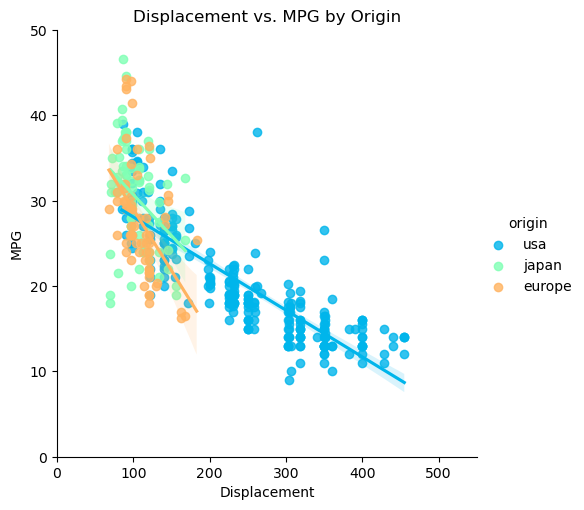

In [294]:
graph = sns.lmplot(x="displacement", y="mpg", hue="origin", data=df, palette="rainbow")
graph.set(xlim=(0, 550), ylim=(0, 50))
plt.title('Displacement vs. MPG by Origin')
plt.xlabel('Displacement')
plt.ylabel('MPG')
plt.show()

In [272]:
#MPG value decreases as the displacement increases
#Note the max engine volume values for each country